# 0.) Import the Credit Card Fraud Data From CCLE

In [49]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [50]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [51]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/week3/fraudTest.csv/fraudTest.csv")

In [52]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [53]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-53-447c4c88ddae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-53-447c4c88ddae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [54]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,7
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,9
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,15
555717,2020-12-31 23:59:24,travel,7.99,129,0,24


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [57]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [58]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

In [59]:
rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

In [60]:
oversample = SMOTE()
sm_X,sm_y = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [89]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [90]:
log_reg_over=LogisticRegression().fit(over_X,over_y)

In [91]:
log_reg_under=LogisticRegression().fit(under_X,under_y)

In [92]:
log_reg_smote=LogisticRegression().fit(sm_X,sm_y)

# 4.) Test the three models

In [81]:
from sklearn.metrics import accuracy_score

In [93]:
over_logit_pred = log_reg_over.predict(X_test)

In [94]:
print("Accuracy:", accuracy_score(y_test, over_logit_pred))

Accuracy: 0.8156445692075146


In [96]:
under_logit_pred = log_reg_under.predict(X_test)

In [97]:
print("Accuracy:", accuracy_score(y_test, under_logit_pred))

Accuracy: 0.812741428537153


In [98]:
smote_logit_pred = log_reg_smote.predict(X_test)

In [99]:
print("Accuracy:", accuracy_score(y_test, smote_logit_pred))

Accuracy: 0.8224045682477986


# 5.) Which performed best in Out of Sample metrics?

SMOTE performs best since it has largest accuracy score.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [101]:
raw_temp=pd.concat([X_train,y_train],axis=1)

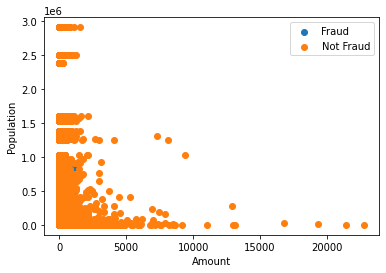

In [102]:
plt.scatter(raw_temp[raw_temp["is_fraud"]==1]["amt"],raw_temp[raw_temp["is_fraud"]==1]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"]==0]["amt"],raw_temp[raw_temp["is_fraud"]==0]["city_pop"])
plt.legend(["Fraud","Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

In [103]:
raw_temp_s=pd.concat([sm_X,sm_y],axis=1)

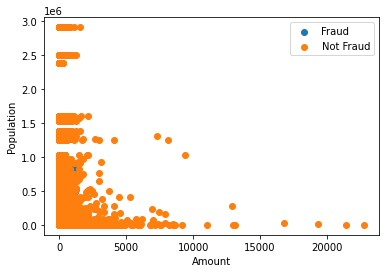

In [104]:
plt.scatter(raw_temp_s[raw_temp_s["is_fraud"]==1]["amt"],raw_temp_s[raw_temp_s["is_fraud"]==1]["city_pop"])
plt.scatter(raw_temp_s[raw_temp_s["is_fraud"]==0]["amt"],raw_temp_s[raw_temp_s["is_fraud"]==0]["city_pop"])
plt.legend(["Fraud","Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()